# **Computational Drug Discovery-Regression Models with Random Forest**



## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
df = pd.read_csv('/content/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp (1).csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6637,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6638,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6639,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6640,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [4]:
Y = df.pIC50
Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
6637,4.337242
6638,4.416688
6639,5.767004
6640,5.000000


### **3.3. Let's examine the data dimension**

In [5]:
X.shape

(6642, 881)

In [6]:
Y.shape

(6642,)

### **3.4. Remove low variance features**

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [8]:
X.shape

(6642, 144)

## **4. Data split (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((5313, 144), (5313,))

In [11]:
X_test.shape, Y_test.shape

((1329, 144), (1329,))

## **5. Building a Regression Model using Random Forest**

R-squared: 0.5427429028979212


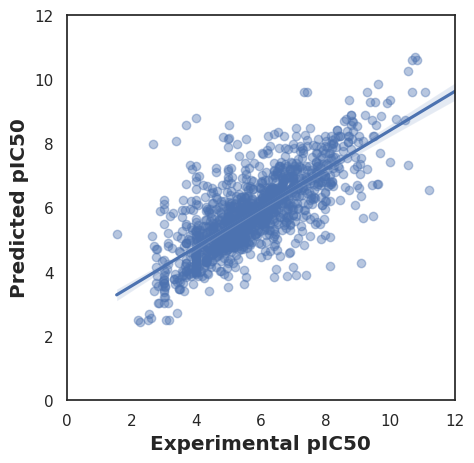

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and Y are NumPy arrays (features and target)
# Step 1: Convert X (NumPy array) to DataFrame
X_df = pd.DataFrame(X)

# Step 2: Convert Y (NumPy array) to Series (with a name for later use)
Y_series = pd.Series(Y, name='target')

# Step 3: Combine X and Y into a single DataFrame
df_full = pd.concat([X_df, Y_series], axis=1)

# Step 4: Drop rows with NaNs (if any)
df_clean = df_full.dropna()

# Step 5: Split the cleaned DataFrame into X and Y again
X_clean = df_clean.drop('target', axis=1)  # Features (X)
Y_clean = df_clean['target']  # Target (Y)

# Step 6: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)

# Step 7: Initialize the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100)

# Step 8: Train the model
model.fit(X_train, Y_train)

# Step 9: Make predictions on the test set
Y_pred = model.predict(X_test)

# Step 10: Evaluate the model (R-squared score)
r2 = model.score(X_test, Y_test)
print(f"R-squared: {r2}")

# Step 11: Create a scatter plot of experimental vs predicted values
sns.set(color_codes=True)
sns.set_style("white")

# Use regplot to plot the experimental vs predicted pIC50 values
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

# Display the plot
plt.show()


In [16]:
Y_pred = model.predict(X_test)